In [ ]:
from qtrangeslider import QRangeSlider
from qtrangeslider.qtcompat.QtCore import Qt
from qtrangeslider.qtcompat.QtWidgets import QApplication

app = QApplication([])

slider = QRangeSlider(Qt.Horizontal)
slider = QRangeSlider(Qt.Horizontal)

slider.setValue((20, 80))
slider.show()

app.exec()

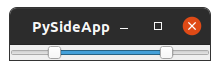

In [ ]:
from qtrangeslider import QDoubleSlider
from qtrangeslider.qtcompat.QtCore import Qt
from qtrangeslider.qtcompat.QtWidgets import QApplication

app = QApplication([])

slider = QDoubleSlider(Qt.Horizontal)
slider.setRange(0, 1)
slider.setValue(0.5)
slider.show()

app.exec_()

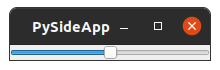

In [ ]:
from qtrangeslider import QRangeSlider
from qtrangeslider.qtcompat import QtCore
from qtrangeslider.qtcompat import QtWidgets as QtW

QSS = """
QSlider {
    min-height: 20px;
}

QSlider::groove:horizontal {
    border: 0px;
    background: qlineargradient(x1:0, y1:0, x2:1, y2:1, stop:0 #888, stop:1 #ddd);
    height: 20px;
    border-radius: 10px;
}

QSlider::handle {
    background: qradialgradient(cx:0, cy:0, radius: 1.2, fx:0.35,
                                fy:0.3, stop:0 #eef, stop:1 #002);
    height: 20px;
    width: 20px;
    border-radius: 10px;
}

QSlider::sub-page:horizontal {
    background: qlineargradient(x1:0, y1:0, x2:1, y2:1, stop:0 #227, stop:1 #77a);
    border-top-left-radius: 10px;
    border-bottom-left-radius: 10px;
}

QRangeSlider {
    qproperty-barColor: qlineargradient(x1:0, y1:0, x2:1, y2:1, stop:0 #227, stop:1 #77a);
}
"""


class DemoWidget(QtW.QWidget):
    def __init__(self) -> None:
        super().__init__()

        reg_hslider = QtW.QSlider(QtCore.Qt.Horizontal)
        reg_hslider.setValue(50)
        range_hslider = QRangeSlider(QtCore.Qt.Horizontal)
        range_hslider.setValue((20, 80))
        multi_range_hslider = QRangeSlider(QtCore.Qt.Horizontal)
        multi_range_hslider.setValue((11, 33, 66, 88))
        multi_range_hslider.setTickPosition(QtW.QSlider.TicksAbove)

        styled_reg_hslider = QtW.QSlider(QtCore.Qt.Horizontal)
        styled_reg_hslider.setValue(50)
        styled_reg_hslider.setStyleSheet(QSS)
        styled_range_hslider = QRangeSlider(QtCore.Qt.Horizontal)
        styled_range_hslider.setValue((20, 80))
        styled_range_hslider.setStyleSheet(QSS)

        reg_vslider = QtW.QSlider(QtCore.Qt.Vertical)
        reg_vslider.setValue(50)
        range_vslider = QRangeSlider(QtCore.Qt.Vertical)
        range_vslider.setValue((22, 77))

        tick_vslider = QtW.QSlider(QtCore.Qt.Vertical)
        tick_vslider.setValue(55)
        tick_vslider.setTickPosition(QtW.QSlider.TicksRight)
        range_tick_vslider = QRangeSlider(QtCore.Qt.Vertical)
        range_tick_vslider.setValue((22, 77))
        range_tick_vslider.setTickPosition(QtW.QSlider.TicksLeft)

        szp = QtW.QSizePolicy.Maximum
        left = QtW.QWidget()
        left.setLayout(QtW.QVBoxLayout())
        left.setContentsMargins(2, 2, 2, 2)
        label1 = QtW.QLabel("Regular QSlider Unstyled")
        label2 = QtW.QLabel("QRangeSliders Unstyled")
        label3 = QtW.QLabel("Styled Sliders (using same stylesheet)")
        label1.setSizePolicy(szp, szp)
        label2.setSizePolicy(szp, szp)
        label3.setSizePolicy(szp, szp)
        left.layout().addWidget(label1)
        left.layout().addWidget(reg_hslider)
        left.layout().addWidget(label2)
        left.layout().addWidget(range_hslider)
        left.layout().addWidget(multi_range_hslider)
        left.layout().addWidget(label3)
        left.layout().addWidget(styled_reg_hslider)
        left.layout().addWidget(styled_range_hslider)

        right = QtW.QWidget()
        right.setLayout(QtW.QHBoxLayout())
        right.setContentsMargins(15, 5, 5, 0)
        right.layout().setSpacing(30)
        right.layout().addWidget(reg_vslider)
        right.layout().addWidget(range_vslider)
        right.layout().addWidget(tick_vslider)
        right.layout().addWidget(range_tick_vslider)

        self.setLayout(QtW.QHBoxLayout())
        self.layout().addWidget(left)
        self.layout().addWidget(right)
        self.setGeometry(600, 300, 580, 300)
        self.activateWindow()
        self.show()


if __name__ == "__main__":

    import sys
    from pathlib import Path

    dest = Path("screenshots")
    dest.mkdir(exist_ok=True)

    app = QtW.QApplication([])
    demo = DemoWidget()

    if "-snap" in sys.argv:
        import platform

        QtW.QApplication.processEvents()
        demo.grab().save(str(dest / f"demo_{platform.system().lower()}.png"))
    else:
        app.exec_()

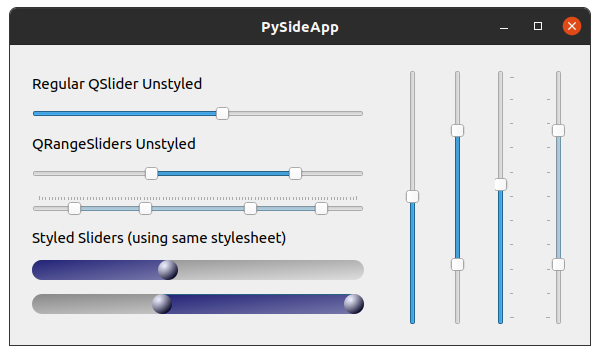

In [ ]:
from qtrangeslider import QDoubleRangeSlider, QDoubleSlider, QRangeSlider
from qtrangeslider.qtcompat.QtCore import Qt
from qtrangeslider.qtcompat.QtWidgets import QApplication, QVBoxLayout, QWidget

app = QApplication([])

w = QWidget()

sld1 = QDoubleSlider(Qt.Horizontal)
sld2 = QDoubleRangeSlider(Qt.Horizontal)
rs = QRangeSlider(Qt.Horizontal)

sld1.valueChanged.connect(lambda e: print("doubslider valuechanged", e))

sld2.setMaximum(1)
sld2.setValue((0.2, 0.8))
sld2.valueChanged.connect(lambda e: print("valueChanged", e))
sld2.sliderMoved.connect(lambda e: print("sliderMoved", e))
sld2.rangeChanged.connect(lambda e, f: print("rangeChanged", (e, f)))

w.setLayout(QVBoxLayout())
w.layout().addWidget(sld1)
w.layout().addWidget(sld2)
w.layout().addWidget(rs)
w.show()
w.resize(500, 150)
app.exec_()

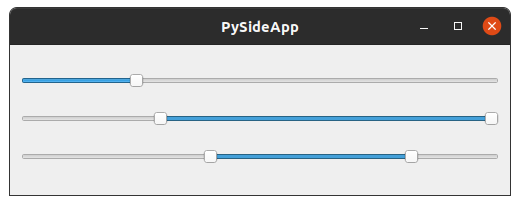

In [ ]:
from qtrangeslider._labeled import (
    QLabeledDoubleRangeSlider,
    QLabeledDoubleSlider,
    QLabeledRangeSlider,
    QLabeledSlider,
)
from qtrangeslider.qtcompat.QtCore import Qt
from qtrangeslider.qtcompat.QtWidgets import (
    QApplication,
    QHBoxLayout,
    QVBoxLayout,
    QWidget,
)

app = QApplication([])

ORIENTATION = Qt.Horizontal

w = QWidget()
qls = QLabeledSlider(ORIENTATION)
qls.valueChanged.connect(lambda e: print("qls valueChanged", e))
qls.setRange(0, 500)
qls.setValue(300)


qlds = QLabeledDoubleSlider(ORIENTATION)
qlds.valueChanged.connect(lambda e: print("qlds valueChanged", e))
qlds.setRange(0, 1)
qlds.setValue(0.5)
qlds.setSingleStep(0.1)

qlrs = QLabeledRangeSlider(ORIENTATION)
qlrs.valueChanged.connect(lambda e: print("QLabeledRangeSlider valueChanged", e))
qlrs.setValue((20, 60))

qldrs = QLabeledDoubleRangeSlider(ORIENTATION)
qldrs.valueChanged.connect(lambda e: print("qlrs valueChanged", e))
qldrs.setRange(0, 1)
qldrs.setSingleStep(0.01)
qldrs.setValue((0.2, 0.7))


w.setLayout(QVBoxLayout() if ORIENTATION == Qt.Horizontal else QHBoxLayout())
w.layout().addWidget(qls)
w.layout().addWidget(qlds)
w.layout().addWidget(qlrs)
w.layout().addWidget(qldrs)
w.show()
w.resize(500, 150)
app.exec()

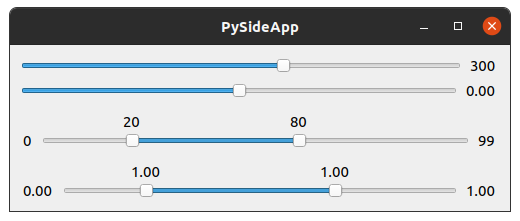

In [ ]:
from qtrangeslider import QRangeSlider
from qtrangeslider.qtcompat.QtWidgets import QApplication

app = QApplication([])

slider = QRangeSlider()
slider.setMinimum(0)
slider.setMaximum(200)
slider.setValue((0, 40, 80, 160))
slider.show()

app.exec_()

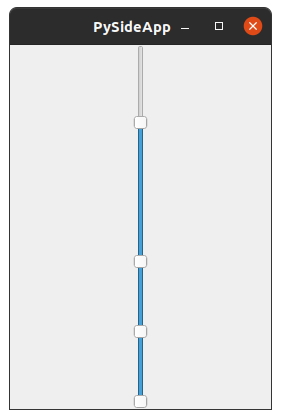